### Added 10% of duplicates 

In [9]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['sex'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

## Adding duplicates

In [10]:
print('--------------------------------------')
sanity_checks_methods.print_duplicates_values(df) 

print(f'\nADDING 10% TO FEATURE \n')

df = sanity_checks_methods.duplicates_values(df, 10)
sanity_checks_methods.print_duplicates_values(df)

--------------------------------------
Number of rows:  9999
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 10% TO FEATURE 

Number of rows:  10998
Duplicate Counts:  999
Percentage of Duplicate Values:  9.083469721767594


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3821
           1       0.97      1.00      0.98      3877

    accuracy                           0.98      7698
   macro avg       0.98      0.98      0.98      7698
weighted avg       0.98      0.98      0.98      7698

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1663
           1       0.94      1.00      0.97      1637

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4999
           1       0.96      1.00      0.98      5000

    accuracy                           0.98      9999


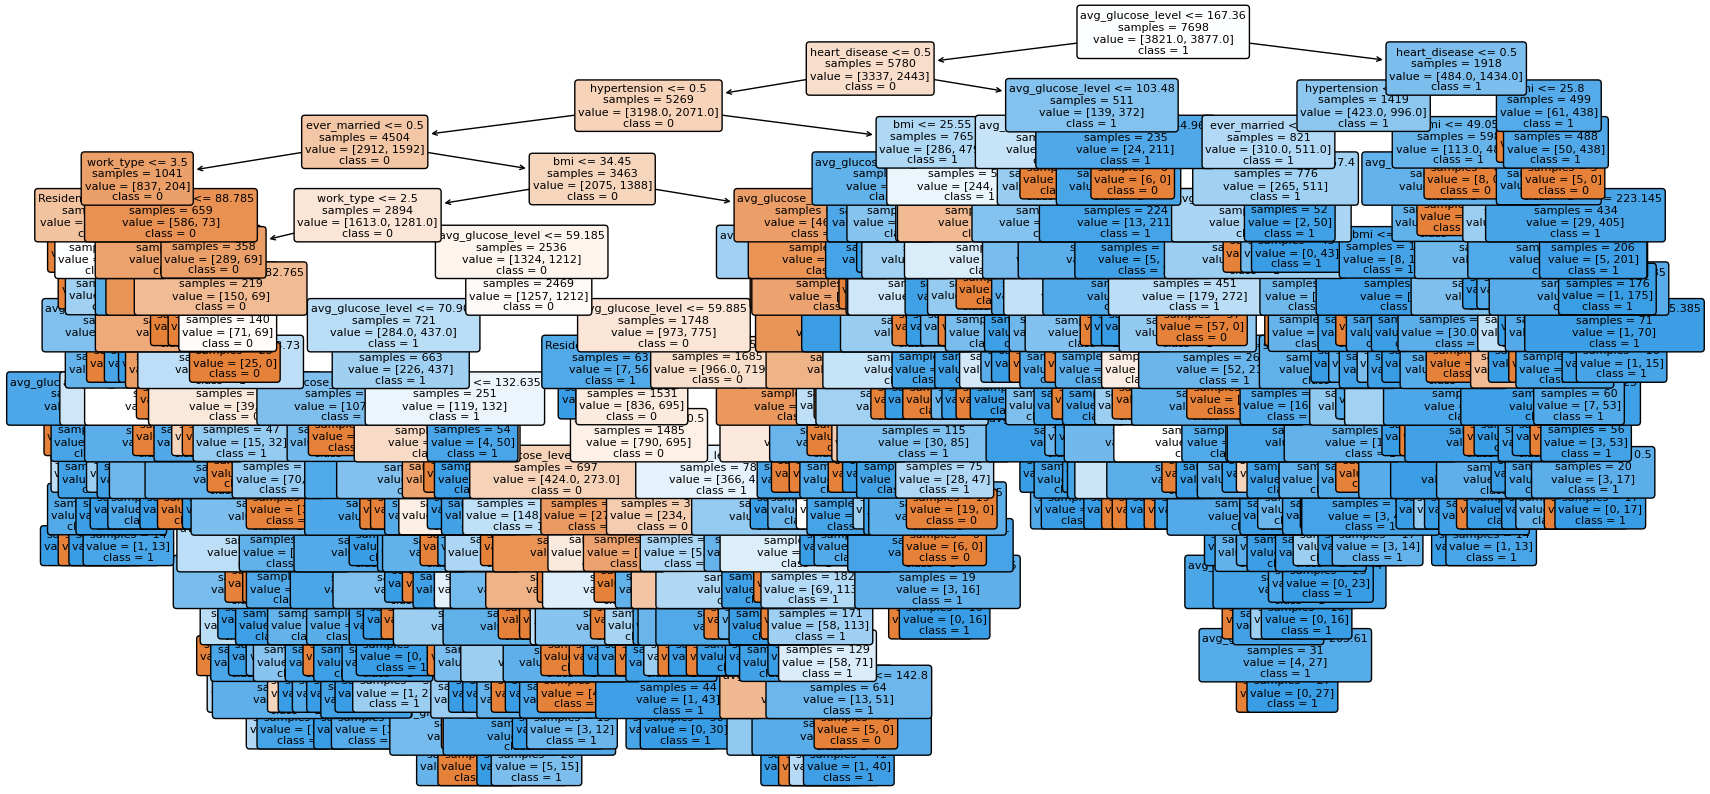

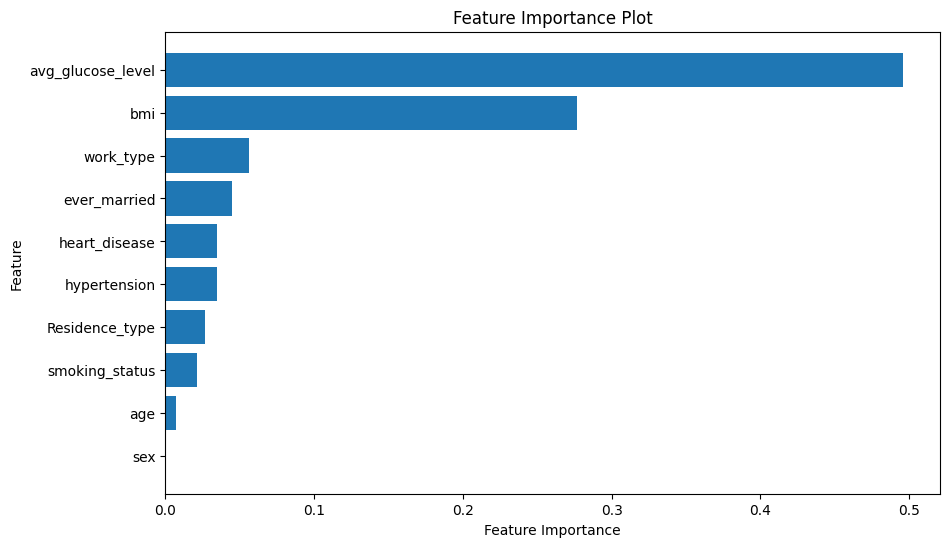

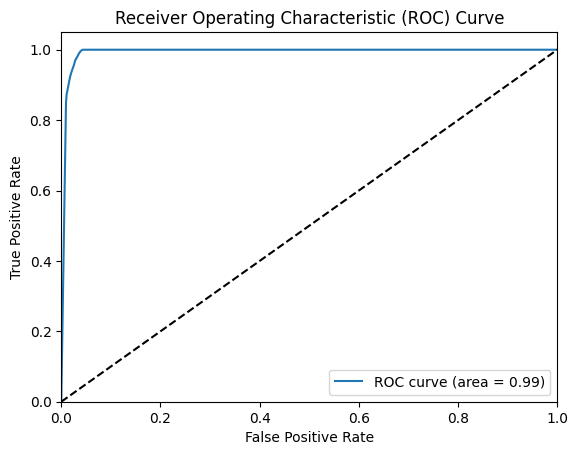

AUC Score: 0.9928962792558512


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9753246753246754, 0.9727272727272728, 0.9623376623376624, 0.9506493506493506, 0.9636363636363636, 0.9805194805194806, 0.9584415584415584, 0.9532467532467532, 0.9505851755526658, 0.9583875162548765]
Mean accuracy: 0.9625855808690659
95% confidence interval: (0.9550585572075933, 0.9701126045305385)


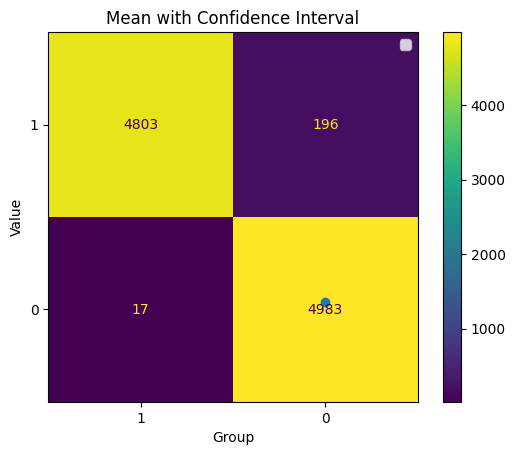

In [11]:
decision_tree = ML_algorithms.train_decision_tree_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 43.2234251499176
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'max_iter': 245, 'min_samples_leaf': 14}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3821
           1       0.99      1.00      1.00      3877

    accuracy                           1.00      7698
   macro avg       1.00      1.00      1.00      7698
weighted avg       1.00      1.00      1.00      7698

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1663
           1       0.97      1.00      0.98      1637

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



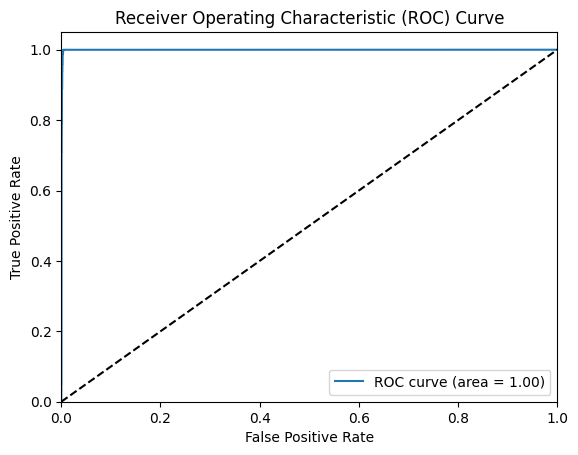

AUC Score: 0.9992377275455091


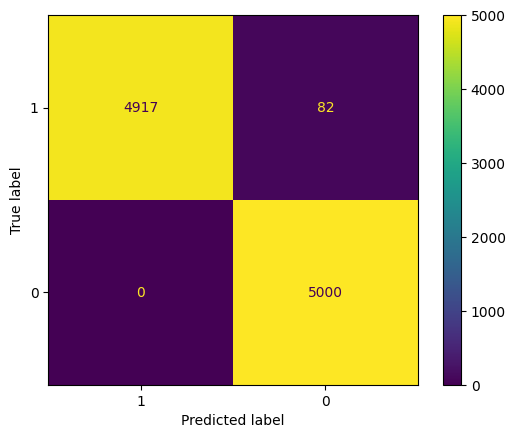

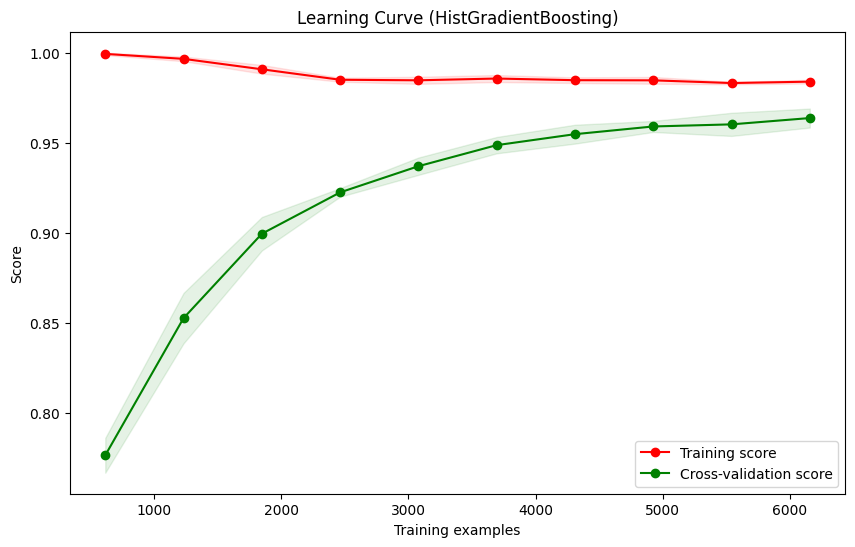

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9844155844155844, 0.9792207792207792, 0.9883116883116884, 0.9727272727272728, 0.9857142857142858, 0.9727272727272728, 0.9844155844155844, 0.9766233766233766, 0.9856957087126138, 0.9778933680104032]
Mean accuracy: 0.980774492087886
95% confidence interval: (0.9767179530072139, 0.9848310311685582)


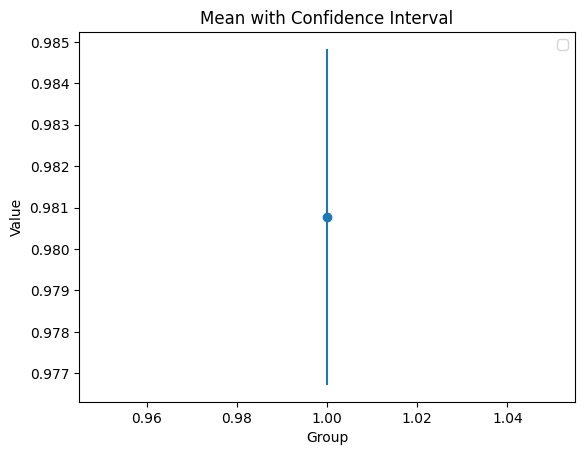

--------------------------------------


In [12]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

print('--------------------------------------')